In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [4]:
from skmdn import MixtureDensityEstimator

In [28]:
import numpy as np
from sklearn.datasets import make_moons
# Generate dataset
n_samples = 1000
X_full, _ = make_moons(n_samples=n_samples, noise=0.1)
X = X_full[:, 0].reshape(-1, 1)  # Use only the first column as input
Y = X_full[:, 1].reshape(-1, 1)  # Predict the second column

# Add some noise to Y to make the problem more suitable for MDN
Y += 0.1 * np.random.randn(n_samples, 1)

In [29]:
mdn = MixtureDensityEstimator()
mdn.fit(X, Y)

MixtureDensityEstimator()

In [67]:
import matplotlib.pylab as plt

In [101]:
pi, mu, sigma = mdn.forward(X)

In [104]:
i = 19
df, ys = mdn.pdf(X[i].reshape(1, -1))

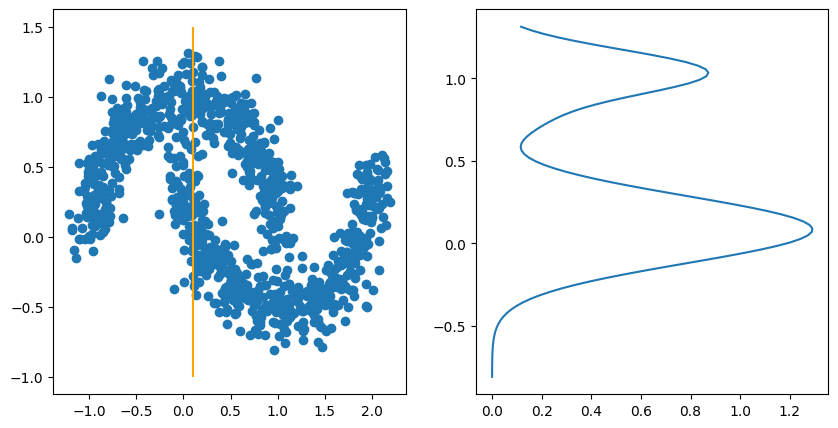

In [127]:
x = 0.1

pdf, ys = mdn.pdf(np.array([x]).reshape(1, -1))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X, Y)
plt.vlines(ymin=-1, ymax=1.5, x=x, color='orange')
plt.subplot(122)
plt.plot(pdf[0], ys)

In [149]:
var90 = mdn.predict_var(X, quantile=0.9, resolution=100000)
var10 = mdn.predict_var(X, quantile=0.1, resolution=100000)

var99 = mdn.predict_var(X, quantile=0.99, resolution=100000)
var01 = mdn.predict_var(X, quantile=0.01, resolution=100000)

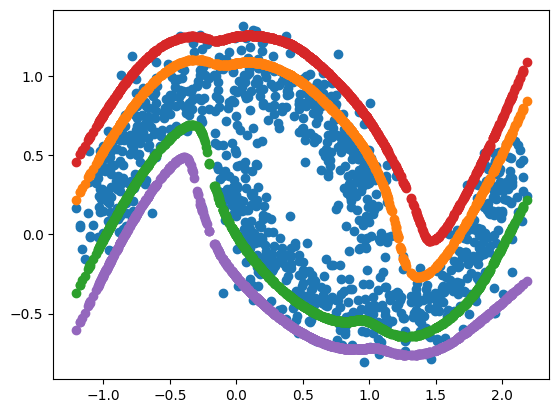

In [150]:
plt.scatter(X, Y)
plt.scatter(X, var90)
plt.scatter(X, var10)
plt.scatter(X, var99)
plt.scatter(X, var01)